In [1]:
import math 
import numpy as np
from sympy import diff, symbols, sin, solve
import matplotlib.pyplot as plt
import random
import statistics

In [2]:
def F1(x_k, a, b):
    return a*x_k +b

def F2(x_k, a, b):
    return (a/(1 + b*x_k))

In [3]:
alfa = random.uniform(0, 1)
beta = random.uniform(0, 1)
k = np.arange(0, 101, 1)
delta = np.random.normal(size=len(k))
y = []

In [4]:
x = np.linspace(0, 1, 101)
y_k = alfa*x + beta

In [5]:
y = []
for i in k:
    x_k = i/100
    y.append(alfa*x_k + beta + delta[i])


In [89]:
def D1(a, b, y):
    D = 0
    k = np.arange(0, 101, 1)
    for t in k:
        x_k = t/100
        D = D + pow(F1(x_k, a, b) - y[t], 2)
    return D

def D2(a, b, y):
    D = 0
    k = np.arange(0, 101, 1)
    for t in k:
        x_k = t/100
        D = D + pow(F2(x_k, a, b) - y[t], 2)
    return D

def div_by_a_D1(a, b, y):
    D = 0
    k = np.arange(0, 101, 1)
    for t in k:
        x_k = t/100
        D = D + 2*x_k*(F1(x_k, a, b) - y[t])
    return D


def div_by_b_D1(a, b, y):
    D = 0
    k = np.arange(0, 101, 1)
    for t in k:
        x_k = t/100
        D = D + 2*1*(F1(x_k, a, b) - y[t])
    return D


def Hes_D1_11(a, b, y):
    D = 0
    k = np.arange(0, 101, 1)
    for t in k:
        x_k = t/100
        D = D + 2*pow(x_k, 2)

    return D

def Hes_D1_12(a, b, y):
    D = 0
    k = np.arange(0, 101, 1)
    for t in k:
        x_k = t/100
        D = D + 2*x_k

    return D
def Hes_D1_22(a, b, y):
    D = 0
    k = np.arange(0, 101, 1)
    for t in k:
        x_k = t/100
        D = D + 2
    return D

def div_by_a_D2(a, b, y):
    D = 0
    k = np.arange(0, 101, 1)
    for t in k:
        x_k = t/100
        D = D + 2*pow(1 + b*x_k, -1)*(F2(x_k, a, b) - y[t])
    return D

def div_by_b_D2(a, b, y):
    D = 0
    k = np.arange(0, 101, 1)
    for t in k:
        x_k = t/100
        D = D - 2*a*x_k*pow(1 + b*x_k, -2)*(F2(x_k, a, b) - y[t])
    return D

def Hes_D2_11(a, b, y):
    D = 0
    k = np.arange(0, 101, 1)
    for t in k:
        x_k = t/100
        D = D + 2*pow(1 + b*x_k, -2)
    return D

def Hes_D2_12(a, b, y):
    D = 0
    k = np.arange(0, 101, 1)
    for t in k:
        x_k = t/100
        D = D - 2*x_k*pow(1 + b*x_k, -2)*(F2(x_k, a, b) - y[t]) - 2*a*x_k*pow(1 + b*x_k, -3)
    return D
def Hes_D2_22(a, b, y):
    D = 0
    k = np.arange(0, 101, 1)
    for t in k:
        x_k = t/100
        D = D + 4*a*pow(x_k, 2)*pow(1 + b*x_k, -3)*(F2(x_k, a, b) - y[t]) + 2*pow(a*x_k, 2)*pow(1 + b*x_k, -4)
    return D
        
def beta_1(a_n, a_n_1, b_n, b_n_1, y):
    return math.fabs((a_n_1 - a_n)*(div_by_a_D1(a_n, b_n, y) - div_by_a_D1(a_n_1, b_n_1, y)) + (b_n_1 - b_n)*(div_by_b_D1(a_n, b_n, y) - div_by_b_D1(a_n_1, b_n_1, y)))/(pow((div_by_b_D1(a_n, b_n, y) - div_by_b_D1(a_n_1, b_n_1, y)), 2) + pow((div_by_a_D1(a_n, b_n, y) - div_by_a_D1(a_n_1, b_n_1, y)), 2))

def beta_2(a_n, a_n_1, b_n, b_n_1, y):
    return math.fabs((a_n_1 - a_n)*(div_by_a_D2(a_n, b_n, y) - div_by_a_D2(a_n_1, b_n_1, y)) + (b_n_1 - b_n)*(div_by_b_D2(a_n, b_n, y) - div_by_b_D2(a_n_1, b_n_1, y)))/(pow((div_by_b_D2(a_n, b_n, y) - div_by_b_D2(a_n_1, b_n_1, y)), 2) + pow((div_by_a_D2(a_n, b_n, y) - div_by_a_D2(a_n_1, b_n_1, y)), 2))
    

In [7]:
def norma(a_n, a_n_1, b_n, b_n_1):
    return pow(pow(a_n - a_n_1, 2) + pow(b_n - b_n_1, 2), 0.5)

In [8]:
a = 0
b = 0
a_GD1 = []
b_GD1 = []
a_GD1.append(a)
b_GD1.append(b)
e = 0.001
beta_0 = 0.0001
a = a - beta_0*div_by_a_D1(a_GD1[0], b_GD1[0], y)
b = b - beta_0*div_by_b_D1(a_GD1[0], b_GD1[0], y)
a_GD1.append(a)
b_GD1.append(b)
i = 1
while norma(a_GD1[i], a_GD1[i-1], b_GD1[i], b_GD1[i-1]) > e:
    
    a = a - beta_1(a_GD1[i], a_GD1[i-1], b_GD1[i], b_GD1[i-1], y)*div_by_a_D1(a_GD1[i], b_GD1[i], y)
    b = b - beta_1(a_GD1[i], a_GD1[i-1], b_GD1[i], b_GD1[i-1], y)*div_by_b_D1(a_GD1[i], b_GD1[i], y)
    a_GD1.append(a)
    b_GD1.append(b)
    
    i += 1

In [9]:
a = 0
b = 0
a_GD2= []
b_GD2= []
a_GD2.append(a)
b_GD2.append(b)
e = 0.001
beta_0 = 0.0001
a = a - beta_0*div_by_a_D2(a_GD2[0], b_GD2[0], y)
b = b - beta_0*div_by_b_D2(a_GD2[0], b_GD2[0], y)
a_GD2.append(a)
b_GD2.append(b)
i = 1
while norma(a_GD2[i], a_GD2[i-1], b_GD2[i], b_GD2[i-1]) > e:
    
    a = a - beta_2(a_GD2[i], a_GD2[i-1], b_GD2[i], b_GD2[i-1], y)*div_by_a_D2(a_GD2[i], b_GD2[i], y)
    b = b - beta_2(a_GD2[i], a_GD2[i-1], b_GD2[i], b_GD2[i-1], y)*div_by_b_D2(a_GD2[i], b_GD2[i], y)
    a_GD2.append(a)
    b_GD2.append(b)
    
    i += 1

In [10]:
a_GD2[len(a_GD2) - 1]

0.5547074479920696

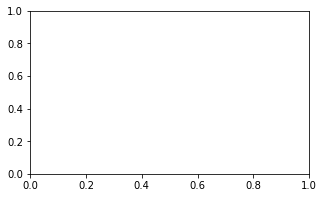

In [11]:
fig, ax = plt.subplots(figsize=(5, 3))

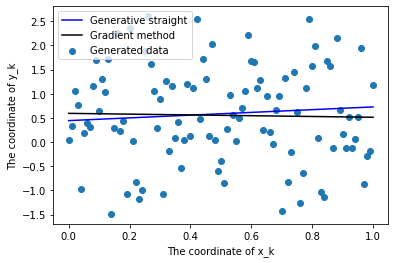

In [102]:
plt.scatter(x, y)
plt.plot(x, y_k, 'b-')
plt.plot(x, F1(x, a_GD1[len(a_GD1) - 1], b_GD1[len(a_GD1) - 1]), 'k-')
plt.xlabel('The coordinate of x_k')
plt.ylabel('The coordinate of y_k')
plt.legend([ "Generative straight", "Gradient method","Generated data"], loc ="upper left")

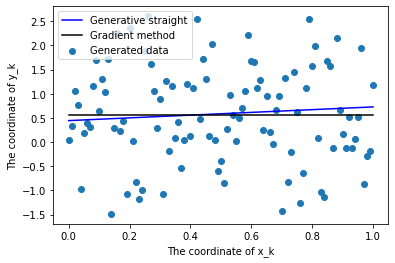

In [103]:
plt.scatter(x, y)
plt.plot(x, y_k, 'b-')
plt.plot(x, F2(x, a_GD2[len(a_GD2) - 1], b_GD2[len(a_GD2) - 1]), 'k-')
plt.xlabel('The coordinate of x_k')
plt.ylabel('The coordinate of y_k')
plt.legend([ "Generative straight", "Gradient method","Generated data"], loc ="upper left")

In [14]:
a_GD2[len(a_GD2) - 1]

0.5547074479920696

метод сопряженных градиентов 

In [15]:
a = 0
b = 0
a_1 = []
b_1 = []
a_1.append(a)
b_1.append(b)
delta_a = []
delta_b = []
delta_a.append(-div_by_a_D1(a, b, y))
delta_b.append(-div_by_b_D1(a, b, y))

In [16]:
def goldsearch(a, b, y, delta_a_0, delta_b_0):
    a_d = 0
    b_d = 10
    k = 0
    e = 0.001
    x_1 = a_d + 0.5*(3-pow(5, 0.5))*(b_d - a_d)
    x_2 = b_d + 0.5*(pow(5, 0.5) - 3)*(b_d - a_d)
    f1 = D1(a + x_1*delta_a_0, b + x_1*delta_b_0, y)
    f2 = D1(a + x_2*delta_a_0, b + x_2*delta_b_0, y)
    k = 2
    while (math.fabs(b_d - a_d)) >= e:
        if f1 < f2:
            a_d = a_d
            b_d = x_2
            x_2 = x_1
            f2 = f1 #следует из условия: x_2 = x_1
            x_1 = a_d + 0.5*(3-pow(5, 0.5))*(b_d - a_d)
            f1 = D1(a + x_1*delta_a_0, b + x_1*delta_b_0, y)
            k += 1
        else:
            a_d = x_1
            b_d = b_d
            x_1 = x_2
            f1 = f2 #следует из условия: x_1 = x_2
            x_2 = b_d + 0.5*(pow(5, 0.5) - 3)*(b_d - a_d)
            f2 = D1(a + x_2*delta_a_0, b + x_2*delta_b_0, y)
            k += 1
    return (x_1 + x_2)/2
    

In [17]:
def beta_FR(delta_a1, delta_b1, delta_a0, delta_b0):
    return ((delta_a1)**2 + (delta_b1)**2)/((delta_a0)**2 + (delta_b0)**2)

In [18]:
def beta_PR(delta_a1, delta_b1, delta_a0, delta_b0):
    return ((delta_a1)**2 + (delta_b1)**2 -((delta_a0)**2 + (delta_b0)**2))/((delta_a0)**2 + (delta_b0)**2)

In [19]:
a = a + goldsearch(a, b, y, delta_a[0], delta_b[0])*delta_a[0]
b = b + goldsearch(a, b, y, delta_a[0], delta_b[0])*delta_b[0]
a_1.append(a)
b_1.append(b)
s_a = delta_a[0]
s_b = delta_b[0]
i = 1

In [20]:
while norma(a_1[i], a_1[i-1], b_1[i], b_1[i-1]) > e:
    delta_a.append(-div_by_a_D1(a, b, y))
    delta_b.append(-div_by_b_D1(a, b, y))
    s_a = delta_a[i] + beta_FR(delta_a[i], delta_b[i], delta_a[i-1], delta_b[i-1])*s_a
    
    s_b = delta_b[i] + beta_FR(delta_a[i], delta_b[i], delta_a[i-1], delta_b[i-1])*s_b
    alpha = goldsearch(a, b, y, s_a, s_b)
    
    a = a + alpha*s_a
    
    b = b + alpha*s_b
    a_1.append(a)
    b_1.append(b)
    i +=1
    

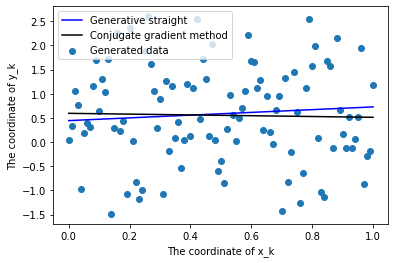

In [104]:
plt.scatter(x, y)
plt.plot(x, y_k, 'b-')
plt.plot(x, F1(x, a_1[len(a_1) - 1], b_1[len(a_1) - 1]), 'k-')

plt.xlabel('The coordinate of x_k')
plt.ylabel('The coordinate of y_k')
plt.legend([ "Generative straight", "Сonjugate gradient method","Generated data"], loc ="upper left")

In [22]:
a = 0
b = 0
a_2 = []
b_2 = []
a_2.append(a)
b_2.append(b)
delta_a = []
delta_b = []
delta_a.append(-div_by_a_D2(a, b, y))
delta_b.append(-div_by_b_D2(a, b, y))

In [23]:
def goldsearch2(a, b, y, delta_a_0, delta_b_0):
    a_d = 0
    b_d = 10
    k = 0
    e = 0.001
    x_1 = a_d + 0.5*(3-pow(5, 0.5))*(b_d - a_d)
    x_2 = b_d + 0.5*(pow(5, 0.5) - 3)*(b_d - a_d)
    f1 = D2(a + x_1*delta_a_0, b + x_1*delta_b_0, y)
    f2 = D2(a + x_2*delta_a_0, b + x_2*delta_b_0, y)
    k = 2
    while (math.fabs(b_d - a_d)) >= e:
        if f1 < f2:
            a_d = a_d
            b_d = x_2
            x_2 = x_1
            f2 = f1 #следует из условия: x_2 = x_1
            x_1 = a_d + 0.5*(3-pow(5, 0.5))*(b_d - a_d)
            f1 = D2(a + x_1*delta_a_0, b + x_1*delta_b_0, y)
            k += 1
        else:
            a_d = x_1
            b_d = b_d
            x_1 = x_2
            f1 = f2 #следует из условия: x_1 = x_2
            x_2 = b_d + 0.5*(pow(5, 0.5) - 3)*(b_d - a_d)
            f2 = D2(a + x_2*delta_a_0, b + x_2*delta_b_0, y)
            k += 1
    return (x_1 + x_2)/2

In [24]:
a = a + goldsearch2(a, b, y, delta_a[0], delta_b[0])*delta_a[0]
b = b + goldsearch2(a, b, y, delta_a[0], delta_b[0])*delta_b[0]
a_2.append(a)
b_2.append(b)
s_a = delta_a[0]
s_b = delta_b[0]
i = 1

In [25]:
while norma(a_2[i], a_2[i-1], b_2[i], b_2[i-1]) > e:
    delta_a.append(-div_by_a_D2(a, b, y))
    delta_b.append(-div_by_b_D2(a, b, y))
    s_a = delta_a[i] + beta_FR(delta_a[i], delta_b[i], delta_a[i-1], delta_b[i-1])*s_a
    
    s_b = delta_b[i] + beta_FR(delta_a[i], delta_b[i], delta_a[i-1], delta_b[i-1])*s_b
    alpha = goldsearch2(a, b, y, s_a, s_b)
    
    a = a + alpha*s_a
    
    b = b + alpha*s_b
    a_2.append(a)
    b_2.append(b)
    i +=1
    

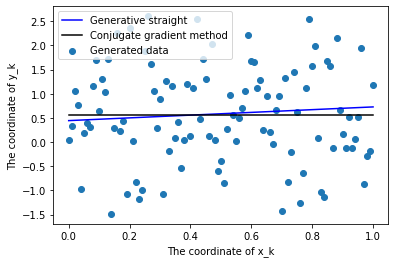

In [105]:
plt.scatter(x, y)
plt.plot(x, y_k, 'b-')
plt.plot(x, F2(x, a_2[len(a_2) - 1], b_2[len(b_2) - 1]), 'k-')


plt.xlabel('The coordinate of x_k')
plt.ylabel('The coordinate of y_k')
plt.legend([ "Generative straight", "Сonjugate gradient method","Generated data"], loc ="upper left")

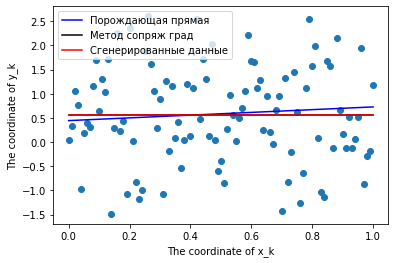

In [27]:
plt.scatter(x, y)
plt.plot(x, y_k, 'b-')
plt.plot(x, F2(x, a_2[len(a_2) - 1], b_2[len(b_2) - 1]), 'k-')
plt.plot(x, F2(x, a_GD2[len(a_GD2) - 1], b_GD2[len(a_GD2) - 1]), 'r-')
plt.xlabel('The coordinate of x_k')
plt.ylabel('The coordinate of y_k')
plt.legend([ "Порождающая прямая", "Метод сопряж град","Сгенерированные данные"], loc ="upper left")

метод Ньютона

In [28]:
a = 0
b = 0
i = 0
a_N_1 = []
b_N_1 = []
a_N_1.append(a)
b_N_1.append(b)
beta = 0.27
a = a - (beta*(div_by_a_D1(a, b, y)*Hes_D1_11(a, b, y) + div_by_b_D1(a, b, y)*Hes_D1_12(a, b, y)))/(Hes_D1_11(a, b, y)*Hes_D1_22(a, b, y) - Hes_D1_12(a, b, y)*Hes_D1_12(a, b, y))
b = b - (beta*(div_by_a_D1(a, b, y)*Hes_D1_12(a, b, y) + div_by_b_D1(a, b, y)*Hes_D1_22(a, b, y)))/(Hes_D1_11(a, b, y)*Hes_D1_22(a, b, y) - Hes_D1_12(a, b, y)*Hes_D1_12(a, b, y))
a_N_1.append(a)
b_N_1.append(b)
i = 1

In [29]:
while norma(a_N_1[i], a_N_1[i-1], b_N_1[i], b_N_1[i-1]) > e:
    a = a - (beta*(div_by_a_D1(a, b, y)*Hes_D1_11(a, b, y) + div_by_b_D1(a, b, y)*Hes_D1_12(a, b, y)))/(Hes_D1_11(a, b, y)*Hes_D1_22(a, b, y) - Hes_D1_12(a, b, y)*Hes_D1_12(a, b, y))
    b = b - (beta*(div_by_a_D1(a, b, y)*Hes_D1_12(a, b, y) + div_by_b_D1(a, b, y)*Hes_D1_22(a, b, y)))/(Hes_D1_11(a, b, y)*Hes_D1_22(a, b, y) - Hes_D1_12(a, b, y)*Hes_D1_12(a, b, y))
    a_N_1.append(a)
    b_N_1.append(b)
    i += 1

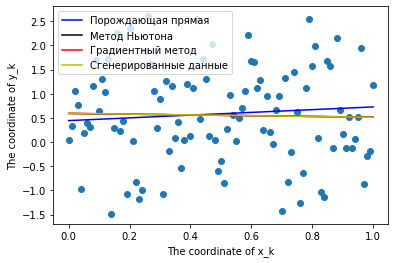

In [30]:
plt.scatter(x, y)
plt.plot(x, y_k, 'b-')
plt.plot(x, F1(x, a_N_1[len(a_N_1) - 1], b_N_1[len(b_N_1) - 1]), 'k-')
plt.plot(x, F1(x, a_GD1[len(a_GD1) - 1], b_GD1[len(a_GD1) - 1]), 'r-')
plt.plot(x, F1(x, a_1[len(a_1) - 1], b_1[len(a_1) - 1]), 'y-')
plt.xlabel('The coordinate of x_k')
plt.ylabel('The coordinate of y_k')
plt.legend([ "Порождающая прямая", "Метод Ньютона","Градиентный метод", "Сгенерированные данные"], loc ="upper left")

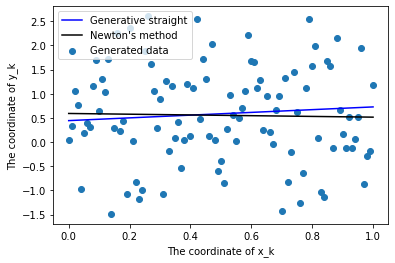

In [107]:
plt.scatter(x, y)
plt.plot(x, y_k, 'b-')
plt.plot(x, F1(x, a_N_1[len(a_N_1) - 1], b_N_1[len(b_N_1) - 1]), 'k-')
plt.xlabel('The coordinate of x_k')
plt.ylabel('The coordinate of y_k')
plt.legend([ "Generative straight", "Newton's method", "Generated data"], loc ="upper left")

In [112]:
a = 0
b = 0
i = 0
e = 0.0000001
a_N_2 = []
b_N_2 = []
a_N_2.append(a)
b_N_2.append(b)
beta = 0.01
a = a - (beta*(div_by_a_D2(a, b, y)*Hes_D2_11(a, b, y) + div_by_b_D2(a, b, y)*Hes_D2_12(a, b, y)))/(Hes_D2_11(a, b, y)*Hes_D2_22(a, b, y) - Hes_D2_12(a, b, y)*Hes_D2_12(a, b, y))
b = b - (beta*(div_by_a_D2(a, b, y)*Hes_D2_12(a, b, y) + div_by_b_D2(a, b, y)*Hes_D2_22(a, b, y)))/(Hes_D2_11(a, b, y)*Hes_D2_22(a, b, y) - Hes_D2_12(a, b, y)*Hes_D2_12(a, b, y))
a_N_2.append(a)
b_N_2.append(b)
i = 1

In [113]:
while norma(a_N_2[i], a_N_2[i-1], b_N_2[i], b_N_2[i-1]) > e:
    a = a - (beta*(div_by_a_D2(a, b, y)*Hes_D2_11(a, b, y) + div_by_b_D2(a, b, y)*Hes_D2_12(a, b, y)))/(Hes_D2_11(a, b, y)*Hes_D2_22(a, b, y) - Hes_D2_12(a, b, y)*Hes_D2_12(a, b, y))
    b = b - (beta*(div_by_a_D2(a, b, y)*Hes_D2_12(a, b, y) + div_by_b_D2(a, b, y)*Hes_D2_22(a, b, y)))/(Hes_D2_11(a, b, y)*Hes_D2_22(a, b, y) - Hes_D2_12(a, b, y)*Hes_D2_12(a, b, y))
    a_N_2.append(a)
    b_N_2.append(b)
    i += 1

In [114]:
x_list = x

In [117]:
from scipy import optimize

In [131]:
bounds = np.asarray([[0.0, 1.0],[0.0, 1.0]])

In [132]:
def d_func_scp(x):
    alg_sum=0
    for i in range(101):
        f = (y[i] - F2(x_list[i], x[0], x[1]))**2
        alg_sum+=f
    return np.mean(alg_sum)

In [133]:
x0 = np.asarray(bounds[:, 0])


In [178]:
fprime = lambda x: optimize.approx_fprime(x, d_func_scp, 0.000000001)
res_newton = optimize.minimize(d_func_scp, x0, method='Newton-CG',jac=fprime)

In [172]:
A_N2, B_N2 = res_newton.x

In [173]:
print(res_newton)

     fun: 99.9655027359418
     jac: array([ 0.68357055, -0.54693317])
 message: "Warning: CG iterations didn't converge. The Hessian is not positive definite."
    nfev: 7
    nhev: 0
     nit: 6
    njev: 92
  status: 3
 success: False
       x: array([0.57458626, 0.06147048])


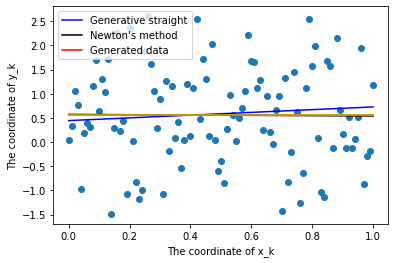

In [174]:
plt.scatter(x, y)
plt.plot(x, y_k, 'b-')
plt.plot(x, F2(x, A_N2, B_N2), 'k-')
plt.plot(x, F2(x, a_GD2[len(a_GD2) - 1], b_GD2[len(a_GD2) - 1]), 'r-')
plt.plot(x, F2(x, a_2[len(a_2) - 1], b_2[len(a_2) - 1]), 'y-')
plt.xlabel('The coordinate of x_k')
plt.ylabel('The coordinate of y_k')
plt.legend([ "Generative straight", "Newton's method", "Generated data"], loc ="upper left")

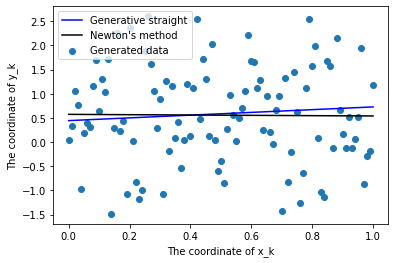

In [175]:
plt.scatter(x, y)
plt.plot(x, y_k, 'b-')
plt.plot(x, F2(x, A_N2, B_N2), 'k-')
plt.xlabel('The coordinate of x_k')
plt.ylabel('The coordinate of y_k')
plt.legend([ "Generative straight", "Newton's method", "Generated data"], loc ="upper left")

метод Левенберга

In [146]:
def d_func_scp_lm(x):
    resudials=[]
    for i in range(101):
        f = (y[i] - F1(x_list[i], x[0], x[1]))**2
        resudials.append(f)
    return np.array(resudials)

In [227]:
from numpy.random import rand


In [228]:
res_lm = optimize.least_squares(d_func_scp_lm,x0,method="lm")
a_M, b_M = res_lm.x


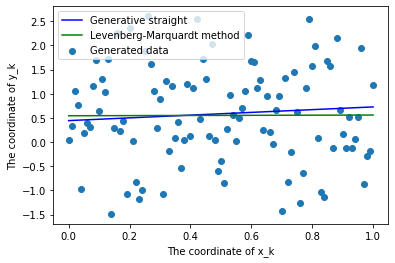

In [218]:
plt.scatter(x, y)
plt.plot(x, y_k, 'b-')
plt.plot(x, F1(x, a_M, b_M), 'g-')
plt.xlabel('The coordinate of x_k')
plt.ylabel('The coordinate of y_k')
plt.legend([ "Generative straight","Levenberg-Marquardt method","Generated data"], loc ="upper left")

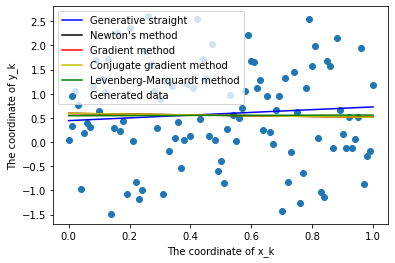

In [219]:
plt.scatter(x, y)
plt.plot(x, y_k, 'b-')
plt.plot(x, F1(x, a_N_1[len(a_N_1) - 1], b_N_1[len(b_N_1) - 1]), 'k-')
plt.plot(x, F1(x, a_GD1[len(a_GD1) - 1], b_GD1[len(a_GD1) - 1]), 'r-')
plt.plot(x, F1(x, a_1[len(a_1) - 1], b_1[len(a_1) - 1]), 'y-')
plt.plot(x, F1(x, a_M, b_M), 'g-')
plt.xlabel('The coordinate of x_k')
plt.ylabel('The coordinate of y_k')
plt.legend([ "Generative straight", "Newton's method","Gradient method" ,"Сonjugate gradient method","Levenberg-Marquardt method","Generated data"], loc ="upper left")

In [160]:
def d_func_scp_lm2(x):
    resudials=[]
    for i in range(101):
        f = (y[i] - F2(x_list[i], x[0], x[1]))**2
        resudials.append(f)
    return np.array(resudials)

In [161]:
res_lm = optimize.least_squares(d_func_scp_lm2,x0,method="lm")

In [162]:
a_2M, b_2M = res_lm.x

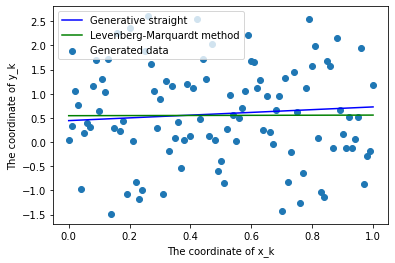

In [168]:
plt.scatter(x, y)
plt.plot(x, y_k, 'b-')
plt.plot(x, F2(x, a_2M, b_2M), 'g-')
plt.xlabel('The coordinate of x_k')
plt.ylabel('The coordinate of y_k')
plt.legend([ "Generative straight","Levenberg-Marquardt method","Generated data"], loc ="upper left")

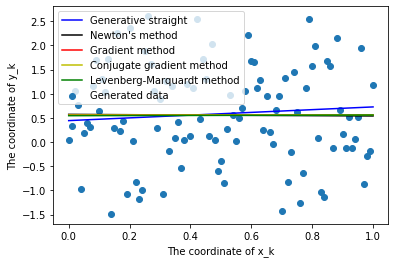

In [176]:
plt.scatter(x, y)
plt.plot(x, y_k, 'b-')
plt.plot(x, F2(x, A_N2, B_N2), 'k-')
plt.plot(x, F2(x, a_GD2[len(a_GD2) - 1], b_GD2[len(a_GD2) - 1]), 'r-')
plt.plot(x, F2(x, a_2[len(a_2) - 1], b_2[len(a_2) - 1]), 'y-')
plt.plot(x, F2(x, a_2M, b_2M), 'g-')
plt.xlabel('The coordinate of x_k')
plt.ylabel('The coordinate of y_k')
plt.legend([ "Generative straight", "Newton's method","Gradient method" ,"Сonjugate gradient method","Levenberg-Marquardt method","Generated data"], loc ="upper left")